# Visuals
pro každý hrací den se to zprůměruje

## Enviroment

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Input

In [25]:
# Internal Input: Function to read the internal file and extract data
def read_excel_to_df(file_path):
    try:
        # Read the Excel file into a DataFrame
        df = pd.read_excel(file_path, engine='openpyxl')
        
        # Check if the DataFrame has the correct number of columns and they are in the expected order
        expected_columns = ['code', 'date', 'event', 'city', 'venue', 'accom. Code', 'flight.Code', 'Standard Accommodation', 'Superior Accommodation', 'Luxurious Accommodation', 'Standard Price', 'Superior Price', 'Luxurious Price', 'Standard Rating', 'Superior Rating', 'Luxurious Rating', 'Min Price', 'Standard Price Total', 'Superior Price Total', 'Luxurious Price Total']
        if len(df.columns) != len(expected_columns) or not all(df.columns == expected_columns):
            # If columns do not match, raise an error
            raise ValueError("Error: Unexpected input form.")

        # Convert the 'date' column to datetime dtype
        df['date'] = pd.to_datetime(df['date'])

        # Return the DataFrame
        return df
    
    except ValueError as ve:
        print(ve)
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [26]:
file_path_accom = '/Users/danielavandasova/Library/CloudStorage/OneDrive-Personal/Documents/3_IES/8-Semestr/Data Analysis in Python/Python_Project/updated_accommodation_data0.xlsx'
accommodation_data = read_excel_to_df(file_path_accom)

## Visuals
### Flight and Accommodation Pricing Trends 
The purpose of this graph is to show how much in advance is it best to book a stay to see a match. The graph contains price averages of each match day in our database.
standard, superior, luxurious

In [29]:
# Create a new DataFrame that contains only the 'date', 'Standard Price Total', 'Superior Price Total', and 'Luxurious Price Total' columns
accommodation_data_1 = accommodation_data[['date', 'Standard Price Total', 'Superior Price Total', 'Luxurious Price Total']]
#print(accommodation_data_1)

In [30]:
# Group the data by 'date' and calculate the mean price for each accommodation type
accommodation_data_1 = accommodation_data_1.groupby('date').mean()
#print(accommodation_data_1)

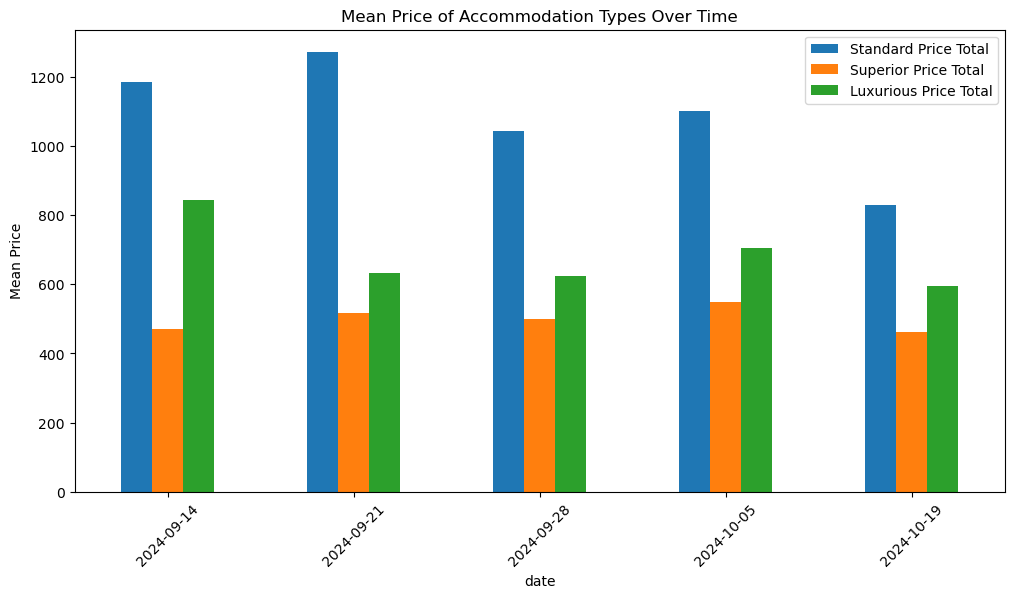

In [31]:
# Consider each date as series and accomodation type as category
# Plot a bar chart that has 3 columns for each date (accomodation type) and the height of the columns is the mean price
accommodation_data_1.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Price of Accommodation Types Over Time')
plt.ylabel('Mean Price')
# Instead of dates on the x-axis, show the dates as strings
plt.xticks(ticks=range(len(accommodation_data_1.index)), labels=[date.strftime('%Y-%m-%d') for date in accommodation_data_1.index], rotation=45)
plt.show()

### Heatmap of Bundle Prices by Match and Bundle Category
The aim of this graph is to show how expensive each match is compared to other matches that each team participates in. It can help the user to select another match of their favourite team for the most favourable price.

In [33]:
# Create a new DataFrame that contains only the 'event', 'Standard Price Total', 'Superior Price Total', and 'Luxurious Price Total' columns
accommodation_data_2 = accommodation_data[['event', 'Standard Price Total', 'Superior Price Total', 'Luxurious Price Total']]
#print(accommodation_data_2)

In [34]:
# Create an empty list, ake the 'event' column and separate it into two columns ('Home' and 'Away') separated by the ' vs. ' string
event_list = []
for event in accommodation_data_2['event']:
    event_list.append(event.split(' vs. '))
    # Appent the 'Standard Price Total', 'Superior Price Total', and 'Luxurious Price Total' columns to the list
    event_list[-1].extend(accommodation_data_2.loc[accommodation_data_2['event'] == event, ['Standard Price Total', 'Superior Price Total', 'Luxurious Price Total']].values[0])
#print(event_list)

# Create a DataFrame from the list
event_df = pd.DataFrame(event_list, columns=['Home', 'Away', 'Standard Price Total', 'Superior Price Total', 'Luxurious Price Total'])
event_df = event_df.groupby(['Home', 'Away']).mean().unstack()
#print(event_df)

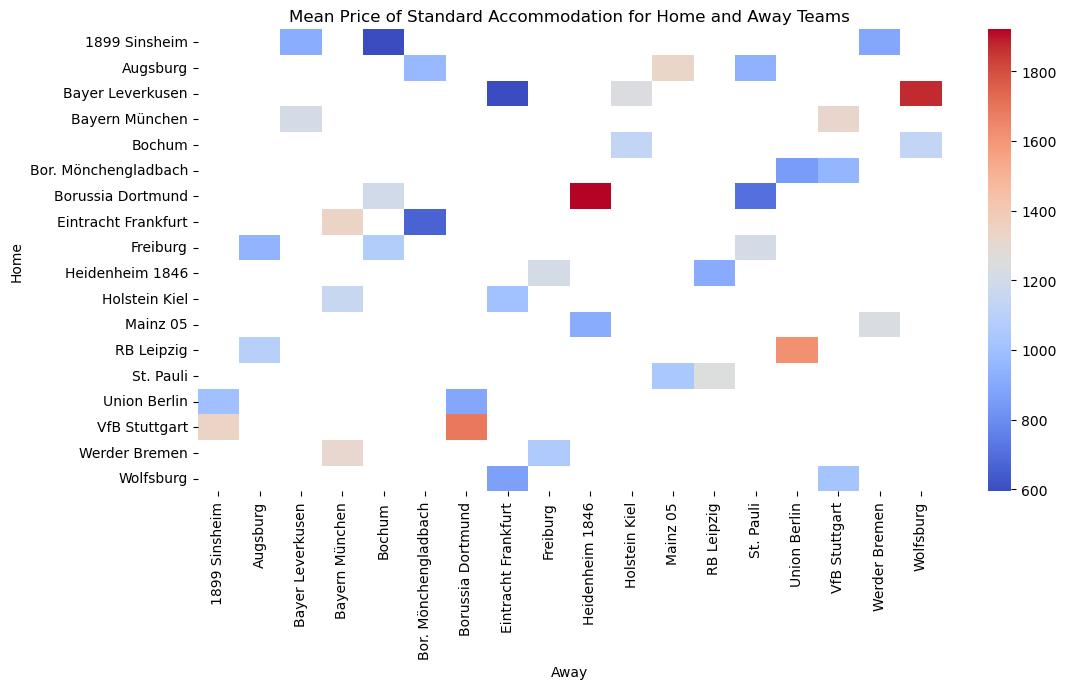

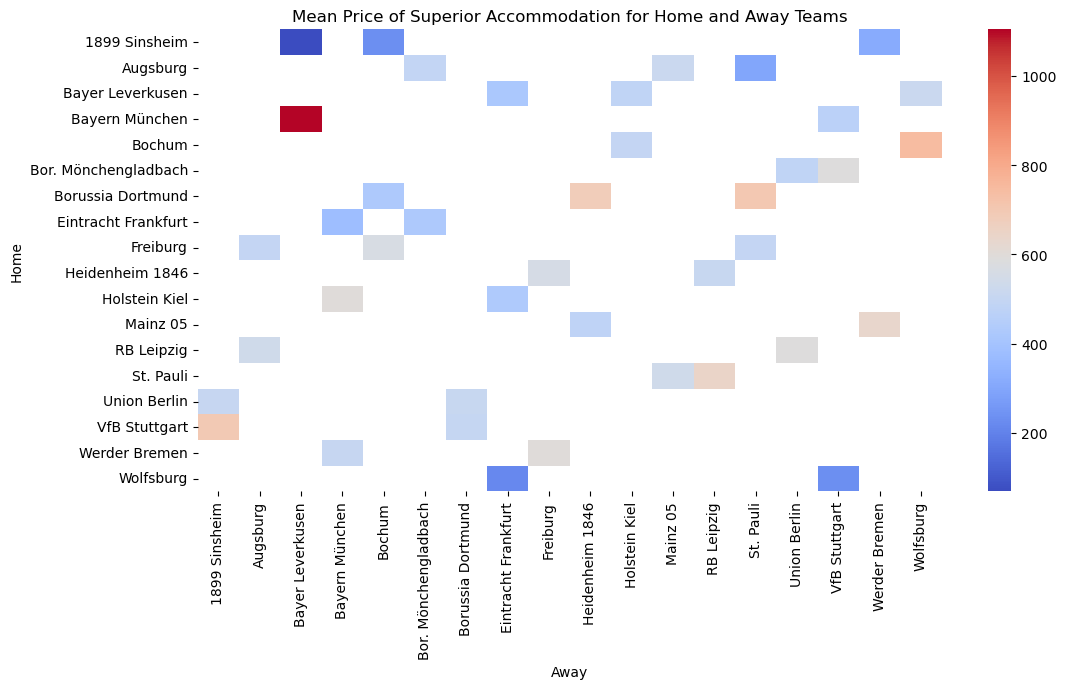

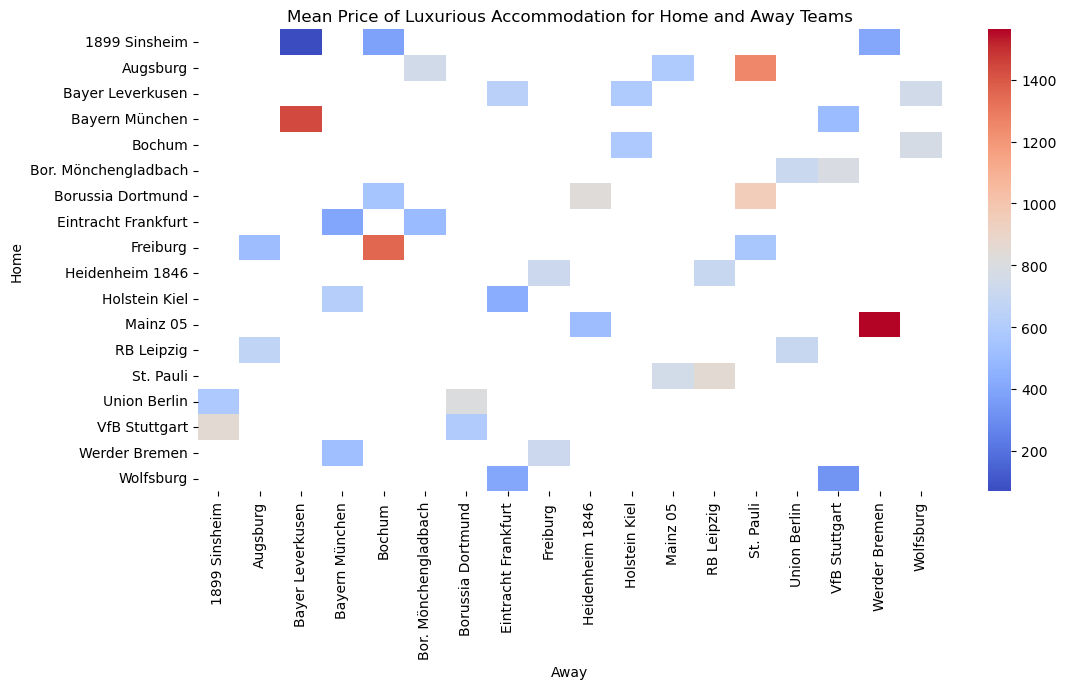

In [35]:
# Create a heatmap that shows Home team on y-axis, Away team on x-axis, and the mean price Standard accommodation as the value
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(event_df['Standard Price Total'], annot=False, cmap='coolwarm')
plt.title('Mean Price of Standard Accommodation for Home and Away Teams')
plt.show()

# Create a heatmap that shows Home team on y-axis, Away team on x-axis, and the mean price Superior accommodation as the value
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(event_df['Superior Price Total'], annot=False, cmap='coolwarm')
plt.title('Mean Price of Superior Accommodation for Home and Away Teams')
plt.show()

# Create a heatmap that shows Home team on y-axis, Away team on x-axis, and the mean price Luxurious accommodation as the value
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(event_df['Luxurious Price Total'], annot=False, cmap='coolwarm')
plt.title('Mean Price of Luxurious Accommodation for Home and Away Teams')
plt.show()